In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np, h5py, os, matplotlib.pyplot as plt
from math import sqrt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
output_path_data = "../hdf5/Scan_{0:d}/scan_{0:d}_data.h5"
output_path_scan = "../hdf5/Scan_{0:d}/scan_{0:d}.h5"
data_paths = {'up': "detectors/lambda_up", 'far': "detectors/lambda_far", 'down': "detectors/lambda_down"}
scan_paths = {'up': "scans/lambda_up", 'far': "scans/lambda_far", 'down': "scans/lambda_down"}
fast_crds_path = "motor_coordinates/fast_coordinates"
slow_crds_path = "motor_coordinates/slow_coordinates"

In [102]:
scan_file = h5py.File(os.path.abspath(output_path.format(143)), 'r')
data_far = scan_file[far_path][:]
data_up = scan_file[up_path][:]
data_down = scan_file[down_path][:]

In [103]:
sums_far = data_far.sum(axis=(-2, -1)).reshape((size, size))
sums_up = data_up.sum(axis=(-2, -1)).reshape((size, size))

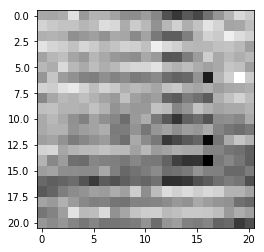

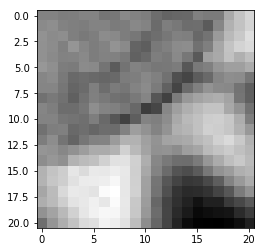

In [104]:
%matplotlib inline
plt.figure()
plt.imshow(sums_far, cmap='gist_gray')
plt.figure()
plt.imshow(sums_up, cmap='gist_gray')
plt.show()

In [291]:
header = '#'
sizeline = '# Points count:'

def get_coords(path, verbose):
    logpath = os.path.join(path)
    if verbose: print("Log path: {}".format(logpath))
    lines, sizes = [], []
    for line in open(logpath, 'r'):
        if line.startswith(header):
            if line.startswith(sizeline):
                try:
                    sizes.append(int(line.strip(sizeline)))
                except:
                    continue
        else:
            lines.append(line)
    fast_size, slow_size = sizes[2], sizes[1]
    del lines[1::(2 * fast_size + 1)]
    slow_crds, fast_crds = [], []
    for line in lines[1::2]:
        parts = line.split(';')
        print(parts)
        try:
            slow_crds.append(float(parts[-2].strip('um')))
            fast_crds.append(float(parts[-1].strip('um')))
        except:
            continue
    if verbose: print("Number of coordinates: {:d}".format(len(fast_crds)))
    return np.array(fast_crds), np.array(slow_crds), fast_size, slow_size

In [292]:
fast_crds, slow_crds, fast_size, slow_size = get_coords("/Users/nivanov/OneDrive/programming/p07_data/Scan_143.log", True)

Log path: /Users/nivanov/OneDrive/programming/p07_data/Scan_143.log
Number of coordinates: 0


In [294]:
slow_crds

array([44.99934225, 45.000329  , 44.99885041, 44.99943741, 44.99993834,
       45.00017268, 44.99995834, 45.00013779, 44.9999865 , 44.99973321,
       44.99953149, 44.99955054, 45.00100023, 45.0002716 , 45.00017732,
       45.0003833 , 44.99965146, 44.99956681, 44.99889317, 45.00113535,
       44.99987654, 45.49994807, 45.50012612, 45.50030296, 45.49998298,
       45.49958844, 45.49961933, 45.50020285, 45.499963  , 45.50035369,
       45.49924067, 45.50055296, 45.4989239 , 45.50013535, 45.50108344,
       45.49982886, 45.49949474, 45.50071528, 45.49913852, 45.50033715,
       45.49937744, 45.50110959, 46.00005433, 45.99920997, 45.99966236,
       46.00068772, 45.99958163, 45.99974896, 46.00019222, 46.0002783 ,
       46.00110963, 45.99979089, 45.99918725, 45.99904341, 45.99981535,
       46.00039387, 46.00014799, 45.99917701, 45.99987147, 46.00026522,
       46.00087387, 45.99993861, 45.99994101, 46.50018206, 46.49989036,
       46.50016179, 46.50030926, 46.50008907, 46.4994507 , 46.49

In [283]:
scan_file = h5py.File(output_path_scan.format(254), 'r')
fast_crds, slow_crds = scan_file[fast_crds_path][:], scan_file[slow_crds_path][:]
fast_size, slow_size = scan_file["scan_size/fast_size"][()], scan_file["scan_size/slow_size"][()]
scans = [scan_file[path][:] for path in scan_paths.values()]
# scanspad = [np.concatenate((scan, np.zeros((fast_size * slow_size - scan.size)))).reshape((fast_size, slow_size)) for scan in scans]

In [286]:
slow_crds

array([49.49775293, 49.49647215, 49.49775846, 49.49671743, 49.49828732,
       49.4970992 , 49.49706002, 49.49697289, 49.49856127, 49.49733034,
       49.496647  , 49.49766739, 49.49823792, 49.49848922, 49.49711584,
       49.49673502, 49.49776146, 49.49719934, 49.49735789, 49.49846498,
       49.49681495, 49.54699938, 49.54741081, 49.54815603, 49.54734493,
       49.54675161, 49.54694326, 49.54689314, 49.54738698, 49.54705373,
       49.54751137, 49.5477533 , 49.54654863, 49.54778547, 49.54774614,
       49.54752454, 49.5465705 , 49.54667249, 49.5479446 , 49.54651428,
       49.54578286, 49.54632612, 49.59721168, 49.59859706, 49.59705665,
       49.59715863, 49.59767722, 49.59727302, 49.59730125, 49.5972968 ,
       49.59756731, 49.59768882, 49.59875781, 49.59767725, 49.59652096,
       49.59724503, 49.59727728, 49.59798621, 49.5972051 , 49.59884414,
       49.59836899, 49.59828732, 49.5975526 , 49.64723873, 49.64720816,
       49.64669278, 49.64746435, 49.6477611 , 49.6473289 , 49.64

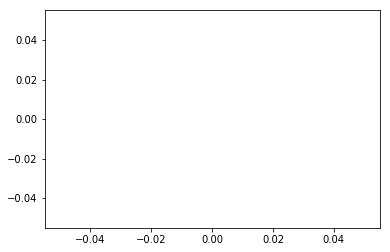

In [284]:
%matplotlib inline
plt.plot(fast_crds)

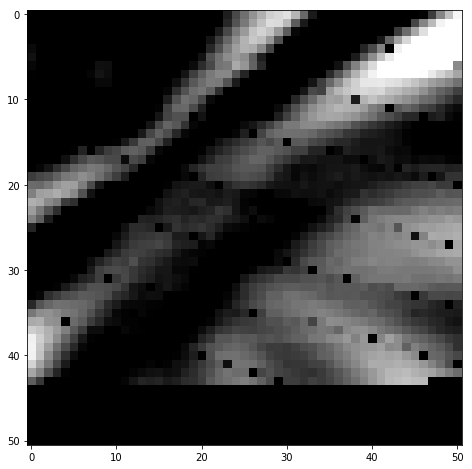

In [274]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.imshow(scanspad[2], vmin=1.15 * scans[2].min(), vmax=0.95 * scans[2].max(), cmap='gist_gray')
plt.show()

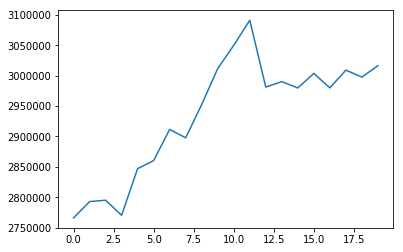

In [201]:
%matplotlib inline
plt.plot((scans[0] + np.concatenate((np.zeros(1), scans[0][:-1,-1] - scans[0][1:,0]))[:, np.newaxis]).ravel()[90:110])